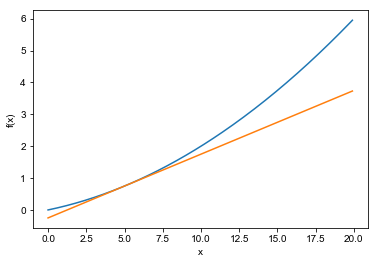

(60, 60)


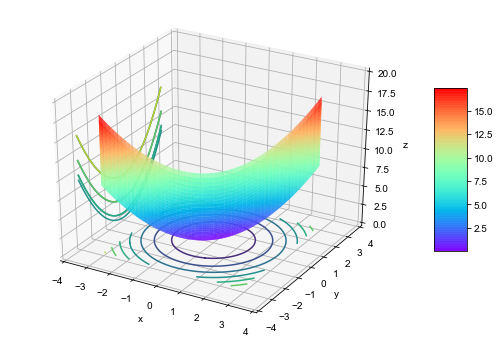

----------------


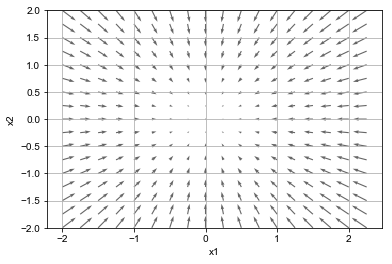

shape of train label:(60000,)
shape of test label:(10000,)
train_size:60000
accuracy:0.1145


In [47]:
#ch04.02 page 85
import sys, os
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import axes3d

sys.path.append(os.pardir) #将父目录（上一级）os.pardir添加到系统搜索路径
#print(os.pardir) # 输出‘..’
from dataset.mnist import load_mnist #在上一级中搜索dataset文件夹（模块）并得到其中mnist.py文件
from PIL import Image


def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))  #unit8, 0~255内存储图像的np数组
    pil_img.show()

#step function
def step_function(x):# if x>=0:  return 1 elif x<0: return 0
    #y=np.array(x>0)
    y=np.array(x>0, dtype=np.int)         
    return y

def sigmoid(x):
    y=1/(1+np.exp(-x))  #和非数组计算的广播功能
    return y

#Rectified Linear Unit function
def ReLU(x):
  #  y=np.array(x)
  #  y[y<=0]=0.0
  #  return y
    return(np.maximum(x,0)) 

#------------------------输出层函数------------------------------
#1. identity_function 恒等函数，apply to regression problems 适合回归问题
def identity(a):
    return a

#2. softmax_function ，apply to classification problems 适合分类问题
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)    #通过减去最大值防止因e指数后各个数值相差太大而出现的溢出现象。
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a  #sum_exp_a为一个常数，此处使用了广播功能
    return y           #sum(y)=1,且y的大小顺序同输入a(y=e**a为单调递增函数)，所以softmax层有时会被省略
#-----------------------损失函数-------------------------------
#1.mean-squared error 均方误差
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

#2.cross entropy error 交叉熵误差
def cross_entropy_error_origin(y,t):
    delta=1e-7 #防止np.log(0)的出现导致-inf（-infinite，无限小），计算无法继续
    return -np.sum(t*np.log(y+delta)) #此值仅由对应正确标签位置的y决定，此时y越大，则说明预测更准，误差越小

#3.mini-batch cross entropy error 批处理交叉熵误差
def cross_entropy_error(y,t):
    delta=1e-7 #防止np.log(0)的出现导致-inf（-infinite，无限小），计算无法继续
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+delta))/batch_size #此值仅由对应正确标签位置的y决定，此时y越大，则说明预测更准，误差越小


def numerical_diff(f,x): #求单个变量的中央差，是导数的近似
    h=1e-4                    
    return (f(x+h)-f(x-h))/(2*h) 

def function_diff(x):
    return 0.01*x**2+0.1*x 

def tangent_line(f,x):
    grad=numerical_diff(f,x)
    y=f(x)-grad*x
    return lambda t:y+grad*t
    
x0=np.arange(0.0,20.0,0.1)
y_org=function_diff(x0)
y_tan0=tangent_line(function_diff,5)
y_tan=y_tan0(x0)

plt.figure()
plt.plot(x0,y_org)
plt.plot(x0,y_tan)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

def numerical_gradient_one(f,x): #求一维梯度，即所有变量的偏导数
    h=1e-4
    grad=np.zeros_like(x)
    for i in range(x.size):
        fx1=x[i]+h
        fx2=x[i]-h
        grad[i]=(f(fx1)-f(fx2))/(2*h)
    return grad

def numerical_gradient(f,x):
    if x.ndim==1:
        return numerical_gradient_one(f,x)
    else:
        grad=np.zeros_like(x)
        for i,xx in enumerate(x):
            grad[i]=numerical_gradient_one(f,xx)
        return grad

def function(x):
    return np.sum(x**2)

def function3(x,y):
    z=x**2+y**2
    return z
#画function的曲面图
figure_out=plt.figure(figsize=(9,6))
ax=plt.gca(projection='3d')
xa=np.arange(-3,3,0.1)
ya=np.arange(-3,3,0.1)
xx,yy=np.meshgrid(xa,ya)
za=function3(xx,yy)
print(za.shape)
surf=ax.plot_surface(xa,ya,za,rstride=1,cstride=1,alpha=0.8,cmap='rainbow')
ax.contour(xx,yy,za,zdir='z',offset=0)
ax.contour(xx,yy,za,zdir='x',offset=-4)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([0,20])
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_zlabel('z')
#axes3d.Axes3D(fig=plt,elev=50)
figure_out.colorbar(surf,shrink=0.5,aspect=5)
plt.savefig(fname='/Users/huangjing/Desktop/figures/3D_contour.png',dpi=600)
plt.show()


#print(numerical_gradient_one(function,np.array([3.0,4.0])))
x1=np.arange(-2,2.5,0.25)
x2=np.arange(-2,2.5,0.25)
X,Y=np.meshgrid(x1,x2)
#print(X)
print('----------------')
X=X.flatten()
Y=Y.flatten()
#print(X)
grad=numerical_gradient(function,np.array([X,Y]))
plt.figure()
plt.quiver(X,Y,-grad[0],-grad[1],angles="xy",color="#666666")
ax.set_xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()
plt.draw()
plt.show()



def init_network(input_size,hidden_size1,hidden_size2,output_size): 
    network={}    #创建字典型变量存储权重和偏置值
    network['w1']=np.random.randn(input_size,hidden_size1)*2**0.5/np.sqrt(input_size) #高斯分布+He初始值
    network['b1']=np.zeros(hidden_size1)
    network['w2']=np.random.randn(hidden_size1,hidden_size2)*2**0.5/np.sqrt(hidden_size1)
    network['b2']=np.zeros(hidden_size2)
    network['w3']=np.random.randn(hidden_size2,output_size)*2**0.5/np.sqrt(hidden_size2)
    network['b3']=np.array(output_size)
    return network

def forward(network,x):
    w1,w2,w3=network['w1'],network['w2'],network['w3']
    b1,b2,b3=network['b1'],network['b2'],network['b3']
    
    a1=np.dot(x,w1)+b1
    z1=sigmoid(a1)     #中间层值为a->z，输出层为y
    a2=np.dot(z1,w2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,w3)+b3
    y=softmax(a3) #softmax适合分类问题
    #y=identity(a3)
    return y

def get_data():
    (x_train, t_train), (x_test, t_test)= load_mnist(flatten=True, normalize=False, one_hot_label=False)
   # print("shape of train data:{}".format(x_train.shape))
    print("shape of train label:{}".format(t_train.shape))
   # print("shape of test data:{}".format(x_test.shape))
    print("shape of test label:{}".format(t_test.shape))
    return x_train, t_train, x_test, t_test
    

x_train,t_train,x_test,t_test=get_data()

'''
#打印示例图片
img_ex=x_train[0]
label_ex=t_train[0]
print("示例标签：{}".format(label_ex))
print("示例图像读入形状：{}".format(img_ex.shape))
img_ex=img_ex.reshape(28,28)
print("示例图像输出形状filter{}".format(img_ex.shape))
print("输出图像：")
img_show(img_ex)
'''

#训练权重数据，隐藏层1含有50个神经元，隐藏层2含有100个神经元
train_size=t_train.shape[0]
print("train_size:{}".format(train_size))
network=init_network(input_size=784,hidden_size1=100,hidden_size2=100,output_size=10)
batch_size=100
batch_mask=np.random.choice(train_size,batch_size)
x=x_train#[batch_mask]
t=t_train#[batch_mask]
accuracy_cnt=0

for i in range(len(x)):
    y=forward(network,x[i])
    p=np.argmax(y)
    if p==t[i]:
        accuracy_cnt+=1
#print("accuracy:{}".format(float(accuracy_cnt)/batch_size))
print("accuracy:{}".format(float(accuracy_cnt)/len(x)))

#print(y)

#try:    
#    !jupyter nbconvert --to python 3layered_neural_network_forward.ipynb
#    # python即转化为.py，script即转化为.html
#except:
#    pass
